**HEART DISEASE DATASET**

Feature --> Description

Age --> Age in years

Sex --> 1 = Male, 0 = Female

ChestPainType --> Type of chest pain experienced (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

RestingBP --> Resting blood pressure (mm Hg)

Cholesterol --> Serum cholesterol level (mg/dl)

FastingBS --> Fasting blood sugar (>120 mg/dl) (1 = True, 0 = False)

RestingECG --> Resting electrocardiographic results (0: Normal, 1: ST-T Wave Abnormality, 2: Left ventricular hypertrophy)

MaxHR --> Maximum heart rate achieved

ExerciseAngina --> Exercise-induced angina (1 = Yes, 0 = No)

OldPeak	--> ST depression induced by exercise

SlopePeakExercise --> Slope of the peak exercise ST segment

NumMajorVessels --> Number of major vessels (0-3) colored by fluoroscopy

Thalium --> Thalium stress test (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

Condition (Target) --> 1 = Heart Disease Present, 0 = No Disease

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import os

#Reading the data
sns.set(style='whitegrid')
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Cleaning up the data
df.rename(columns={
        'age' : 'Age',
        'sex' : 'Sex',
        'cp' : 'ChestPainType',
        'trestbps' : 'RestingBP',
        'chol' : 'Cholesterol',
        'fbs' : 'FastingBS',
        'restecg' : 'RestingECG',
        'thalach' : 'MaxHR',
        'exang' : 'ExerciseAngina',
        'oldpeak' : 'OldPeak',
        'slope' : 'SlopePeakExercise',
        'ca' : 'NumMajorVessels',
        'thal' : 'Thalium',
        'target' : 'Condition'
        }, inplace=True)

sns.set(style='whitegrid')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,OldPeak,SlopePeakExercise,NumMajorVessels,Thalium,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Check columns for null valuess
print(df.isnull().sum())
print('\n')

#Basic information about the dataset
print(df.info())
print('\n')

#Basic summary of numerical statistics
print(df.describe())

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
OldPeak              0
SlopePeakExercise    0
NumMajorVessels      0
Thalium              0
Condition            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestPainType      303 non-null    int64  
 3   RestingBP          303 non-null    int64  
 4   Cholesterol        303 non-null    int64  
 5   FastingBS          303 non-null    int64  
 6   RestingECG         303 non-null    int64  
 7   MaxHR              303 non-null    int64  
 8   ExerciseAngina     303 non-null    int64  
 9   OldPeak            303 no

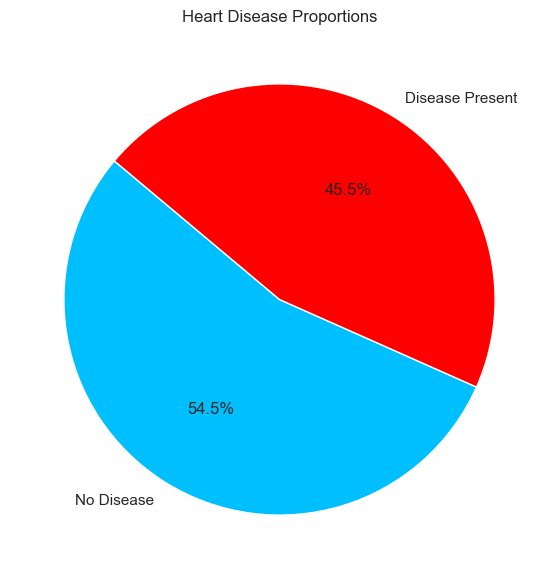

In [4]:
# Define custom color palette
palette = ['#00BFFF', '#FF1493', '#FF0000']
palette2 = ['#00BFFF', '#FF0000']


# Condition distribution as a pie chart
condition_counts = df['Condition'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(condition_counts, labels=['No Disease', 'Disease Present'], autopct='%1.1f%%', startangle=140, colors=palette2)
plt.title('Heart Disease Proportions')
plt.show()


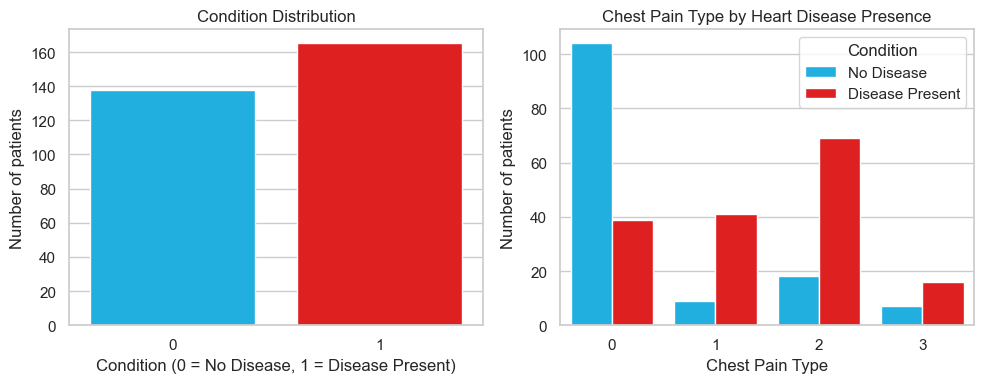

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
This section is used to gather more information from existing data.
Understand the statistics by using visualization techniques such as plotting
pie charts and bar plots on different variables.
'''

plt.figure(figsize=(10,4))

# Visualize class distribution
plt.subplot(1,2,1)
sns.countplot(x='Condition', data=df, palette=palette2)
plt.title('Condition Distribution')
plt.xlabel('Condition (0 = No Disease, 1 = Disease Present)')
plt.ylabel('Number of patients')
plt.tight_layout()

#Chest pain type in relation the presence of heart disease
plt.subplot(1,2,2)
sns.countplot(x='ChestPainType', hue='Condition', data=df, palette=palette2)
plt.title('Chest Pain Type by Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of patients')
plt.legend(title='Condition', labels=['No Disease', 'Disease Present'])
plt.tight_layout()

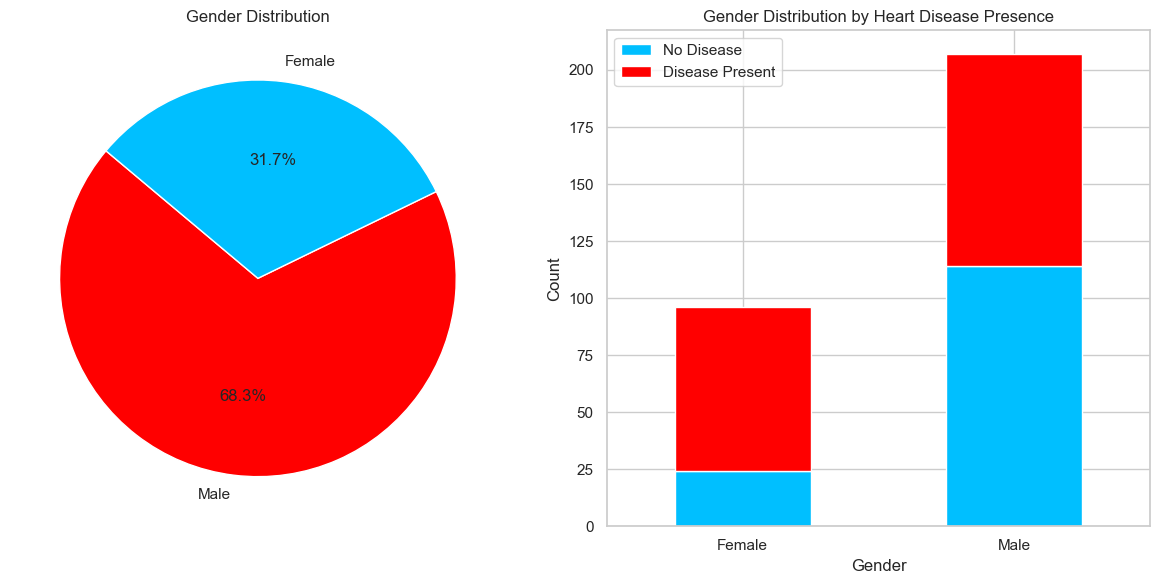

<Figure size 640x480 with 0 Axes>

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender distribution pie chart
gender_counts = df['Sex'].map({0: 'Female', 1: 'Male'}).value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF0000', 'deepskyblue'])
axes[0].set_title('Gender Distribution')

# Gender distribution with condition breakdown (stacked bar chart)
gender_counts = df.groupby(['Sex', 'Condition']).size().unstack()
gender_counts.index = ['Female', 'Male']

gender_counts.plot(kind='bar', stacked=True, color=['deepskyblue', '#FF0000'], ax=axes[1])
axes[1].set_title('Gender Distribution by Heart Disease Presence')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(['No Disease', 'Disease Present'])
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


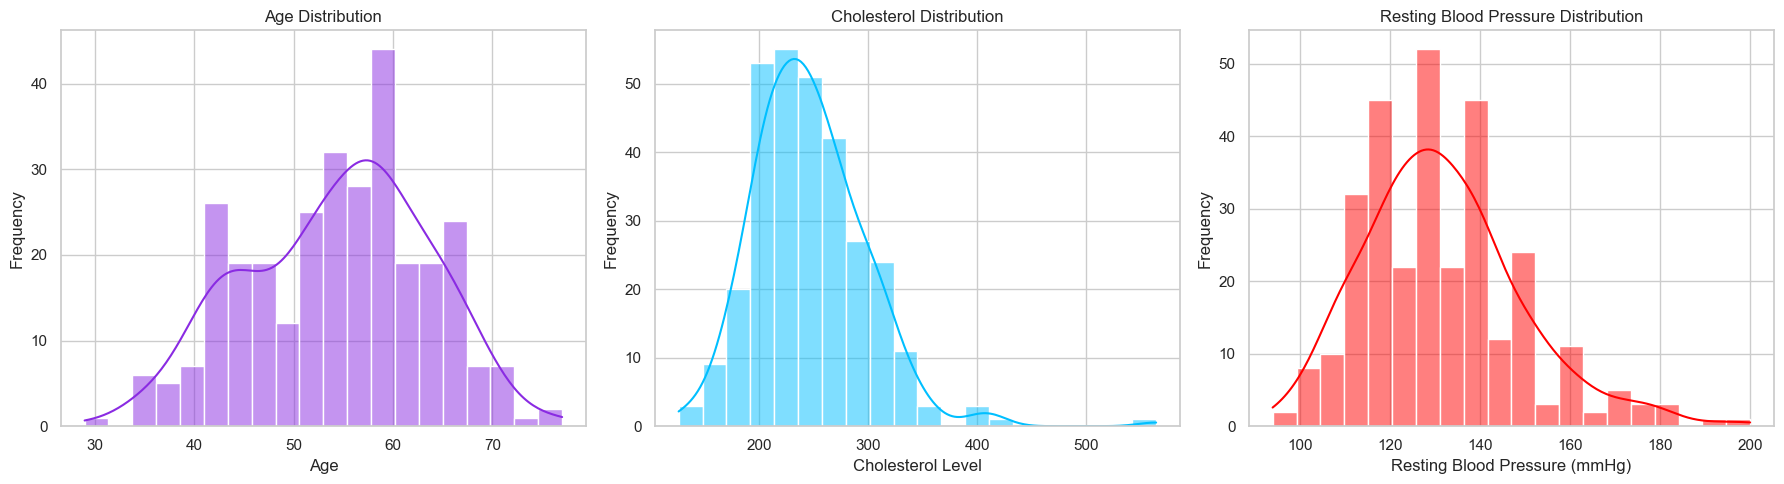

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.histplot(df['Age'], kde=True, bins=20, color='blueviolet', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Cholesterol Distribution
sns.histplot(df['Cholesterol'], kde=True, bins=20, color='deepskyblue', ax=axes[1])
axes[1].set_title('Cholesterol Distribution')
axes[1].set_xlabel('Cholesterol Level')
axes[1].set_ylabel('Frequency')

# Blood Pressure Distribution
sns.histplot(df['RestingBP'], kde=True, bins=20, color='#FF0000', ax=axes[2])
axes[2].set_title('Resting Blood Pressure Distribution')
axes[2].set_xlabel('Resting Blood Pressure (mmHg)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

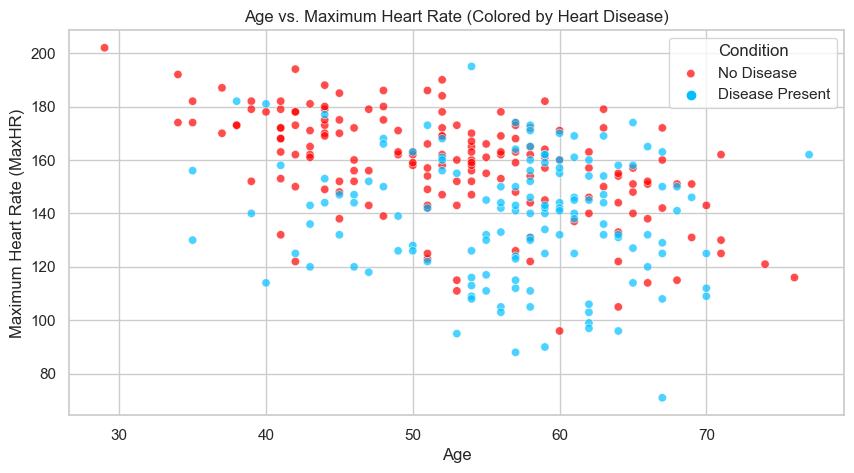

In [8]:
# Age vs. Maximum Heart Rate (Scatter)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Age'], y=df['MaxHR'], hue=df['Condition'], palette=palette2, alpha=0.7)
plt.title('Age vs. Maximum Heart Rate (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.legend(title='Condition', labels=['No Disease', 'Disease Present'])
plt.show()

<Figure size 1000x500 with 0 Axes>

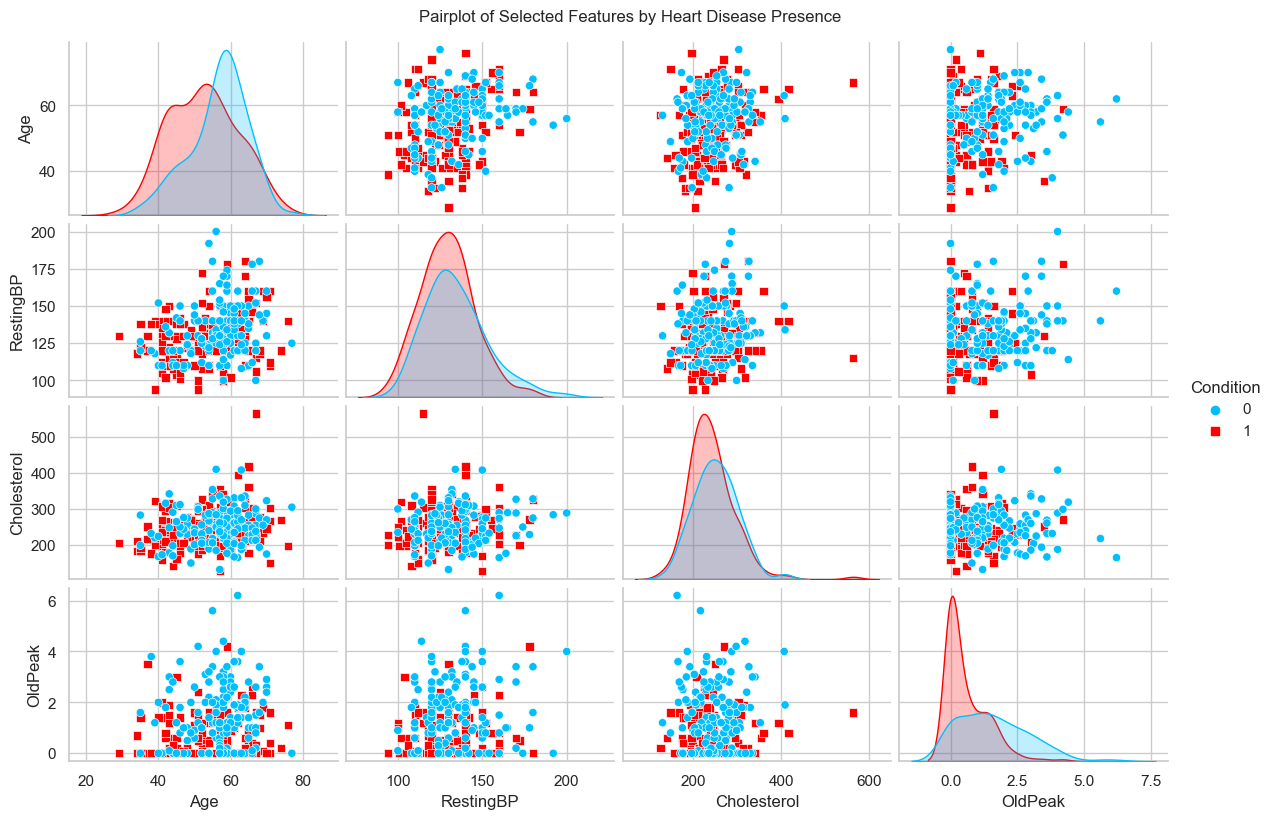

In [9]:
#Pairplot of various relationships
plt.figure(figsize=(10, 5))
columns = ['Age', 'RestingBP', 'Cholesterol', 'OldPeak', 'Condition']
sns.pairplot(df[columns], hue='Condition', diag_kind='kde', palette=palette2, height=2, aspect=1.5, markers=["o", "s"])
plt.suptitle('Pairplot of Selected Features by Heart Disease Presence', y=1.02, fontsize=12)
plt.show()


                 Age       Sex  ChestPainType   RestingBP  Cholesterol  \
Condition                                                                
0          56.601449  0.826087       0.478261  134.398551   251.086957   
1          52.496970  0.563636       1.375758  129.303030   242.230303   

           FastingBS  RestingECG       MaxHR  ExerciseAngina   OldPeak  \
Condition                                                                
0           0.159420    0.449275  139.101449        0.550725  1.585507   
1           0.139394    0.593939  158.466667        0.139394  0.583030   

           SlopePeakExercise  NumMajorVessels   Thalium  
Condition                                                
0                   1.166667         1.166667  2.543478  
1                   1.593939         0.363636  2.121212  


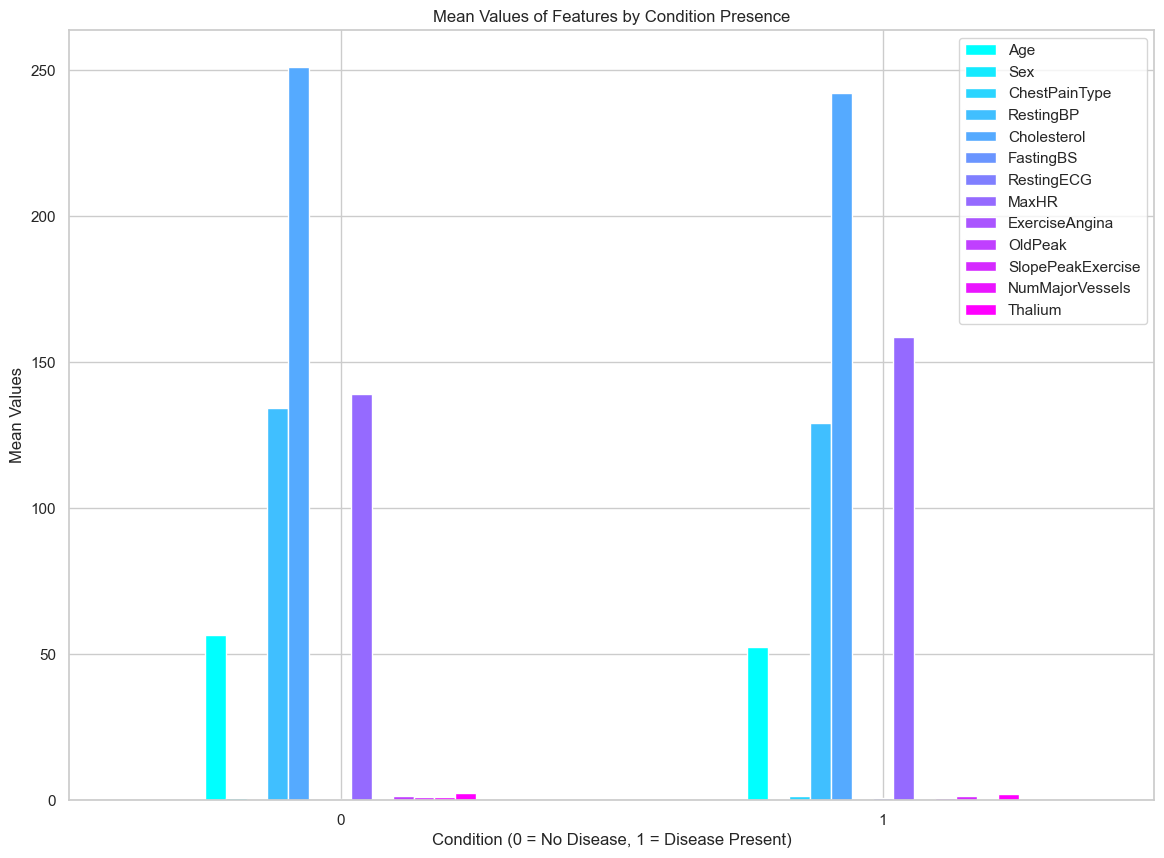

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Analyse some statistical infomation for all the data.

grouped_data = df.groupby('Condition').mean()
print(grouped_data)

# Visualize the grouped data
grouped_data.plot(kind='bar', figsize=(14, 10), colormap='cool')
plt.title('Mean Values of Features by Condition Presence')
plt.xlabel('Condition (0 = No Disease, 1 = Disease Present)')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

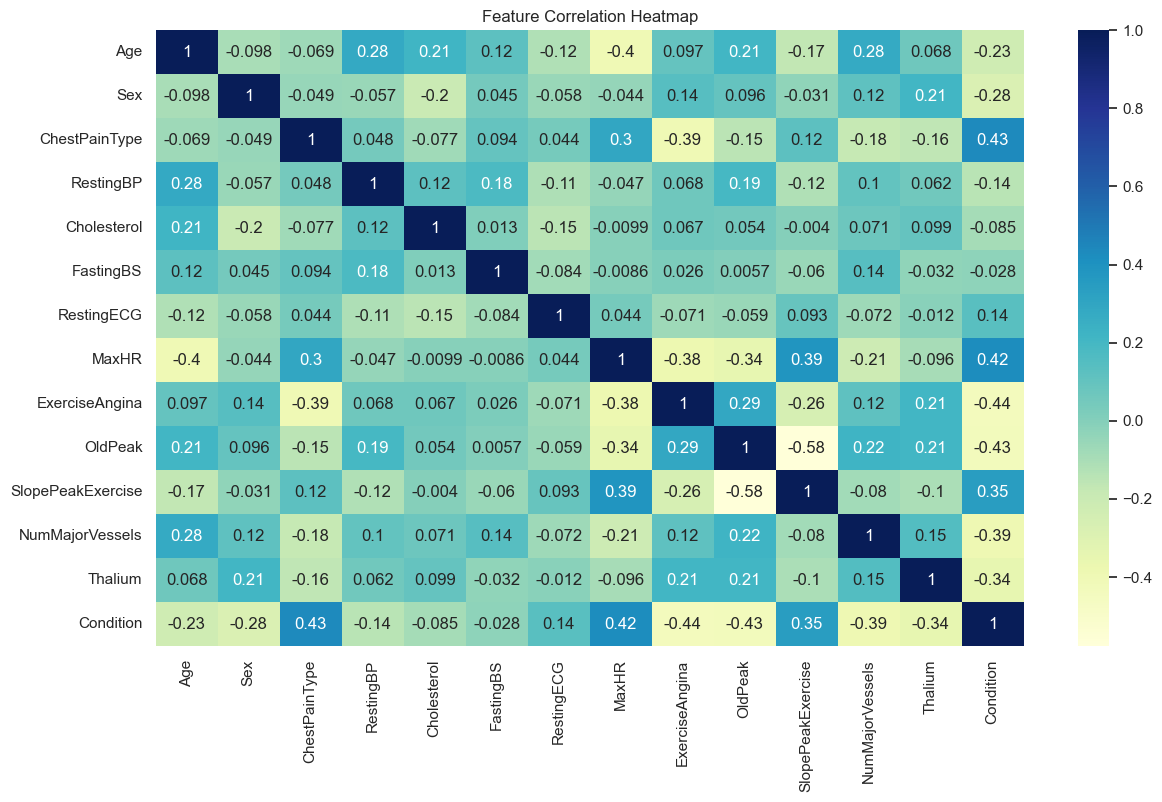

In [11]:
#Eric Correlation Heatmap

#print(data.corr(numeric_only=True))
plt.figure(figsize=(14, 8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

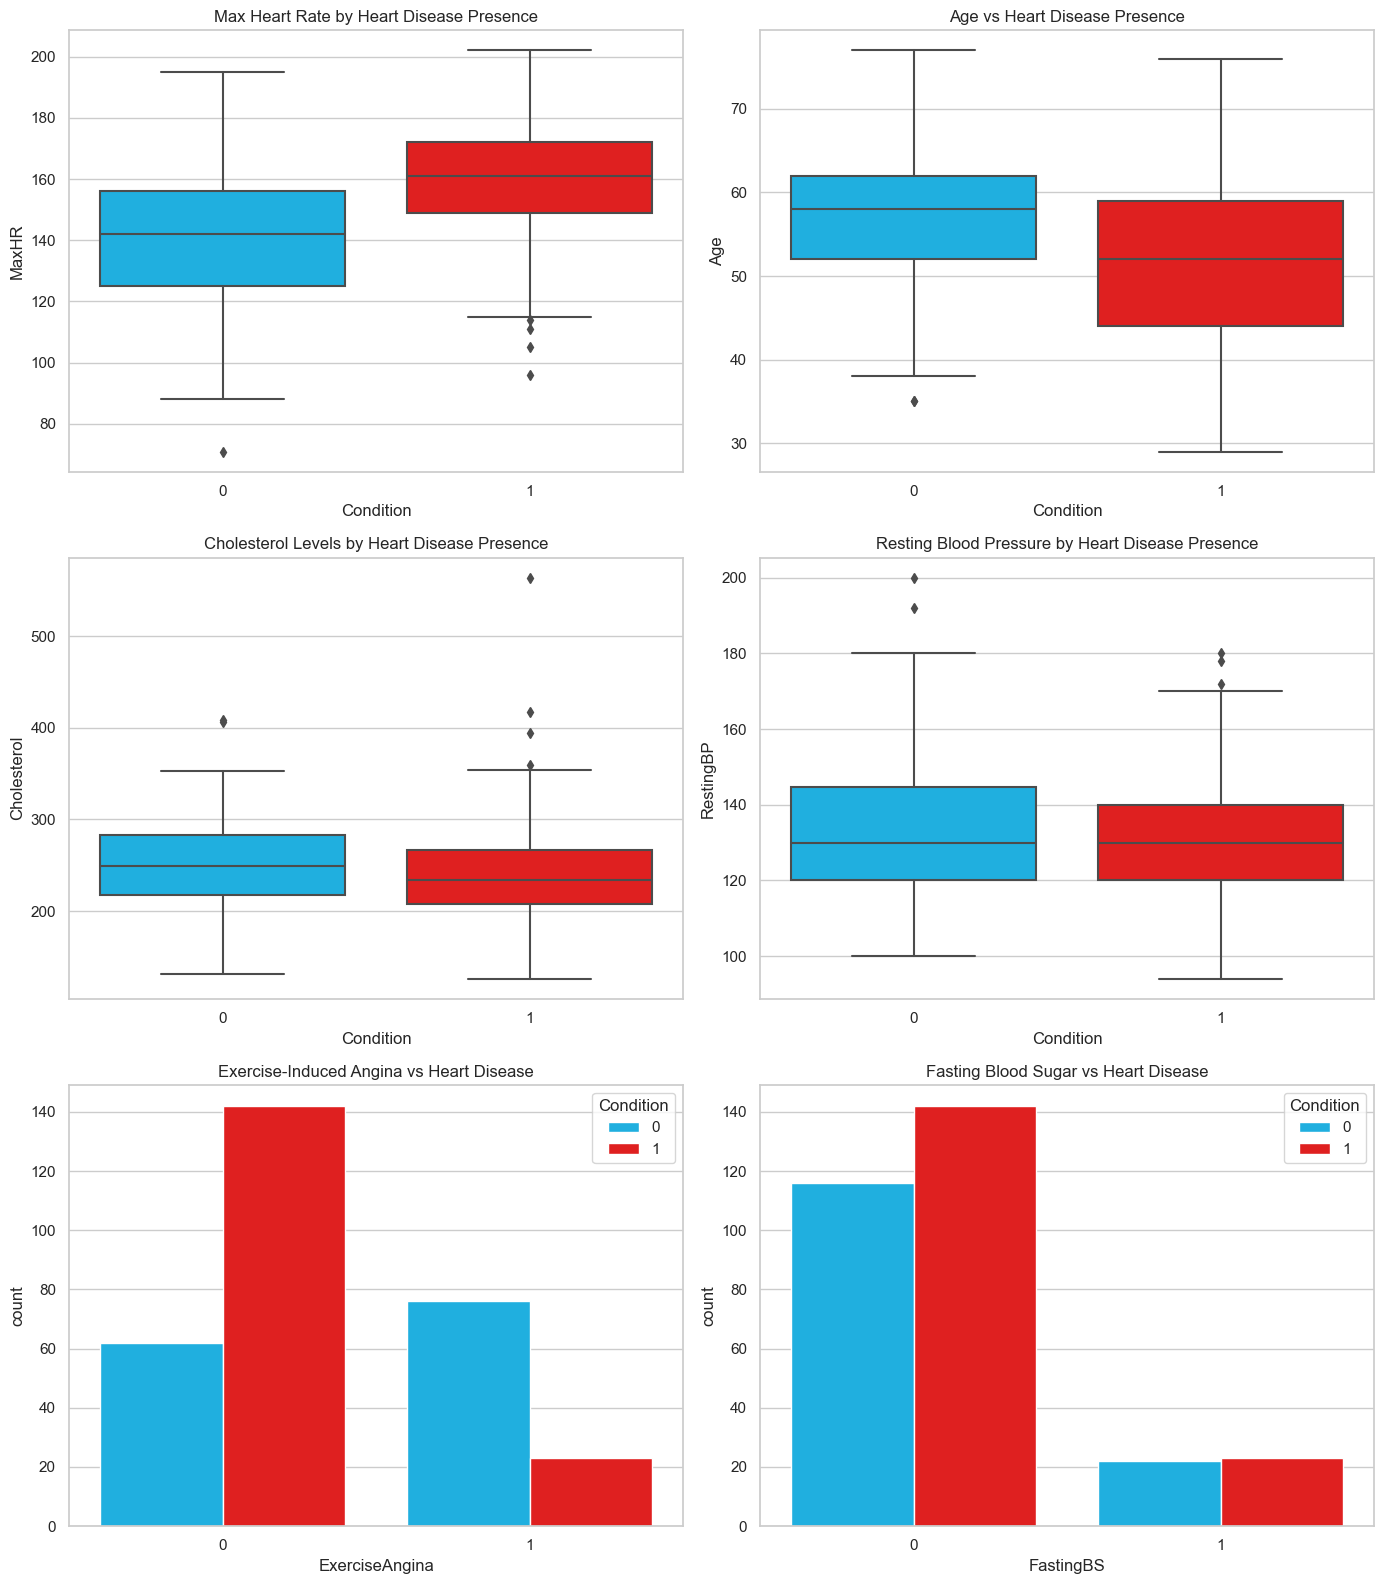

In [12]:
#Risk Factors
#Boxplots: MaxHR, Age, Cholesterol, Blood Pressure, Exercise Angina, Fasting Blood Sugar, ST Depression (OldPeak)
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

sns.boxplot(x='Condition', y='MaxHR', data=df, palette=palette2, ax=axes[0, 0])
axes[0, 0].set_title('Max Heart Rate by Heart Disease Presence')

sns.boxplot(x='Condition', y='Age', data=df, palette=palette2, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Heart Disease Presence')

sns.boxplot(x='Condition', y='Cholesterol', data=df, palette=palette2, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Levels by Heart Disease Presence')

sns.boxplot(x='Condition', y='RestingBP', data=df, palette=palette2, ax=axes[1, 1])
axes[1, 1].set_title('Resting Blood Pressure by Heart Disease Presence')

sns.countplot(x='ExerciseAngina', hue='Condition', data=df, palette=palette2, ax=axes[2, 0])
axes[2, 0].set_title('Exercise-Induced Angina vs Heart Disease')

sns.countplot(x='FastingBS', hue='Condition', data=df, palette=palette2, ax=axes[2, 1])
axes[2, 1].set_title('Fasting Blood Sugar vs Heart Disease')


plt.tight_layout()
plt.show()


**Key Takeaways**

1. Condition Distribution: The dataset has a **fairly balanced distribution** of patients with and without heart disease (with 54.4% having heart disease and 45.6% not having it). However, the dataset is slightly imbalanced, which can impact model performance. 

2. Age Distribution: The **average age is around 54 years**, with a fairly wide age range (29 to 77). The majority of patients with heart disease seem to be older, with heart disease being more prevalent among older individuals. Younger individuals (below 40) tend to have a lower occurrence of heart disease.

3. MaxHR vs. Age: The scatter plot shows that **older individuals tend to have a lower maximum heart rate**, which is a typical sign of a reduced cardiovascular capacity with age.

4. Gender Distribution: There are slightly more male patients than female patients in the dataset. However, heart disease seems to **affect both genders similarly**, with slightly more male patients diagnosed with the disease.

5. Gender vs. Condition: The stacked bar chart shows that the condition is fairly distributed across both genders, but there may be a slightly higher percentage of male patients with heart disease.

6. Chest Pain Type: The type of chest pain (ChestPainType) plays a key role in diagnosing heart disease. A higher frequency of heart disease is associated with patients having typical angina or non-anginal pain. These are significant risk factors to consider.

7. Cholesterol Distribution: Cholesterol levels tend to be **higher among those with heart disease**. Patients with higher cholesterol (specifically above 250) are more likely to have heart disease.

8. Cholesterol vs. Condition: The boxplot shows a **wider spread in cholesterol levels among those with heart disease compared to those without**, indicating that cholesterol is a strong factor to consider when diagnosing heart disease.

9. Resting BP: The resting blood pressure (RestingBP) doesn't have a huge variation between patients with and without heart disease, although patients with heart disease tend to have slightly higher values, as seen in the boxplot.

10. RestingBP Distribution: Resting BP is mostly within the 120-140 mmHg range for most patients, and there is **no extreme outlier behavior** in this feature.

11. Exercise-Induced Angina: Patients with heart disease are **significantly more likely to have exercise-induced angina (ExerciseAngina = 1)**. This is an important risk factor. The count plot visually emphasizes that Exercise Angina is strongly associated with heart disease, confirming its importance as a predictor.

12. Correlation Heatmap: The heatmap shows that features like MaxHR, OldPeak, and Cholesterol have noticeable correlations with the target, indicating their importance in predicting heart disease.

13. Risk Factor Boxplots: From the boxplots, we see that MaxHR, Cholesterol, Age, and OldPeak are risk factors strongly associated with heart disease. The distinction between the two classes (with and without heart disease) is clearer for these features.

Summary of Key Findings:
- Key Risk Factors for Heart Disease: **Age, cholesterol, chest pain type, maximum heart rate, and old peak (ST depression)** 
- Possible Predictors: Features like **ChestPainType, MaxHR, Age, and OldPeak** appear to have the strongest relationships with heart disease and could be pivotal in a predictive model.
- Overall Insights: Older age, high cholesterol, and typical chest pain types correlate strongly with the presence of heart disease. The data suggests that these features should be prioritized when building a predictive model.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [14]:
print("Splitting data into training, validation, and test sets:")

# Defining features and target
X = df.drop(columns=['Condition'])
y = df['Condition']

# Split data into train (80%), validation (10%), test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set: ", X_train.shape)
print("Validation set: ", X_val.shape)
print("Test set: " , X_test.shape)

Splitting data into training, validation, and test sets:
Training set:  (242, 13)
Validation set:  (30, 13)
Test set:  (31, 13)


In [15]:
# Warning handling
warnings.simplefilter(action='ignore', category=FutureWarning)

# Model Initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Standardizing Data for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store accuracies for each model
accuracies = {}

In [16]:
# Fit models and evaluate
for model_name, model in models.items():
    print(f"\nTraining {model_name}:")
    
    # Training the model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_val_pred = model.predict(X_val_scaled)
    
    # Calculating accuracy
    acc = accuracy_score(y_val, y_val_pred)
    accuracies[model_name] = acc  # Store accuracy
    
    # Printing model results
    print(f"{model_name} Accuracy on Validation Set: {acc:.4f}")
    print(f"Report on Validation Set:\n{classification_report(y_val, y_val_pred)}")


print("\nModel Accuracy Summary:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")


Training Logistic Regression:
Logistic Regression Accuracy on Validation Set: 0.8333
Report on Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.79      0.94      0.86        16

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30


Training Support Vector Machine:
Support Vector Machine Accuracy on Validation Set: 0.8333
Report on Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.79      0.94      0.86        16

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30


Training K-Nearest Neighbors:
K-Nearest Neighbors Accuracy on Validation Set: 0.8000
Report on Validation Set:
    

**Key Takeaways**
> 1. Logistic Regression:
Accuracy: 0.8333 (Initial)
Logistic Regression performed decently, providing a solid baseline for comparison.
The results suggest that Logistic Regression can be effective with heart disease prediction, with its relatively higher accuracy compared to some other models.

> 2. SVM (Support Vector Machine):
Accuracy: 0.8333 (Initial)
SVM showed performance similar to Logistic Regression, demonstrating that linear models can handle the heart disease dataset well, especially when properly tuned.

> 3. K-Nearest Neighbors (KNN):
Accuracy: 0.8000 (Initial)
KNN performed slightly worse compared to Logistic Regression and SVM. This is expected as KNN can be sensitive to feature scaling, and might require tuning on k-values or distance metrics to perform better.

> 4. Random Forest:
Accuracy: 0.8667 (Initial)
Random Forest showed the best performance at this stage, which is a common result for tree-based models, especially with datasets containing both continuous and categorical variables.


Random Forest’s relatively high accuracy suggests it is effective at handling the complexity of the data, capturing both linear and non-linear relationships.

In [17]:
# Hyperparameter Tuning (GridSearchCV)

# Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_reg_grid.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression Parameters: {log_reg_grid.best_params_}")
log_reg_best_acc = log_reg_grid.best_score_
print(f"Best Logistic Regression Accuracy: {log_reg_best_acc:.4f}")

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)
print(f"Best SVM Parameters: {svm_grid.best_params_}")
svm_best_acc = svm_grid.best_score_
print(f"Best SVM Accuracy: {svm_best_acc:.4f}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)
print(f"Best KNN Parameters: {knn_grid.best_params_}")
knn_best_acc = knn_grid.best_score_
print(f"Best KNN Accuracy: {knn_best_acc:.4f}")

# Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, verbose=1)
rf_grid.fit(X_train_scaled, y_train)
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best Random Forest Accuracy: {rf_grid.best_score_:.4f}")

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.8432
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.8393
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN Accuracy: 0.8270
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8307


**Key Takeaways**

> 1. Logistic Regression:
**Best Parameters:** {'C': 0.01, 'solver': 'liblinear'} 
**Accuracy:** 0.8432 (After tuning) 
- Logistic Regression still maintains a strong performance after tuning, with a slight improvement in accuracy.
- This shows that the model benefits from regularization (C value), helping to avoid overfitting.

> 2. SVM (Support Vector Machine):
**Best Parameters:** {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} 
**Accuracy:** 0.8393 (After tuning)
- SVM also showed improvement after tuning. The C value and gamma parameter adjustments have allowed SVM to slightly outperform its initial result.
- SVM’s performance after tuning suggests it is sensitive to the choice of hyperparameters, but when well-tuned, it can perform similarly to Logistic Regression.

> 3. K-Nearest Neighbors (KNN):
**Best Parameters:** {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'} 
**Accuracy:** 0.8270 (After tuning)
- Although KNN showed improvement, its performance still lags behind Logistic Regression and SVM. This might be due to the nature of KNN, which struggles with high-dimensional datasets without a well-chosen k-value or distance metric.
- Fine-tuning helped KNN to better capture relationships in the data, but it remains less competitive compared to other models.

> 4. Random Forest:
**Best Parameters:** {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} 
**Accuracy:** 0.8307 (After tuning)
- After hyperparameter tuning, Random Forest's performance slightly decreased in terms of accuracy, although it still remains a strong contender.
- The model benefits from depth control (max_depth), splitting criteria (min_samples_split), and number of estimators (n_estimators), showing it is a robust model for this dataset but might be prone to slight overfitting with certain hyperparameter choices.

In [18]:
# Final Model Evaluation on Test Set
print("\nFinal Model Evaluation on Test Set:")

# Dictionary to store test set accuracy
test_accuracies = {}

# Evaluate each model on the test set
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        model = log_reg_grid.best_estimator_
    elif model_name == 'Support Vector Machine':
        model = svm_grid.best_estimator_
    elif model_name == 'K-Nearest Neighbors':
        model = knn_grid.best_estimator_
    elif model_name == 'Random Forest':
        model = rf_grid.best_estimator_

    y_test_pred = model.predict(X_test_scaled)
    
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies[model_name] = test_acc
    
    print(f"{model_name} Accuracy on Test Set: {test_acc:.4f}")
    print(f"Classification Report on Test Set:\n{classification_report(y_test, y_test_pred)}")

print("\nModel Test Accuracy Comparison:")
for model_name, acc in test_accuracies.items():
    print(f"{model_name}: {acc:.4f}")



Final Model Evaluation on Test Set:
Logistic Regression Accuracy on Test Set: 0.7419
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.71      0.88      0.79        17

    accuracy                           0.74        31
   macro avg       0.76      0.73      0.73        31
weighted avg       0.75      0.74      0.73        31

Support Vector Machine Accuracy on Test Set: 0.7419
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.71      0.88      0.79        17

    accuracy                           0.74        31
   macro avg       0.76      0.73      0.73        31
weighted avg       0.75      0.74      0.73        31

K-Nearest Neighbors Accuracy on Test Set: 0.7097
Classification Report on Test Set:
              precision    recall  f1-score   support


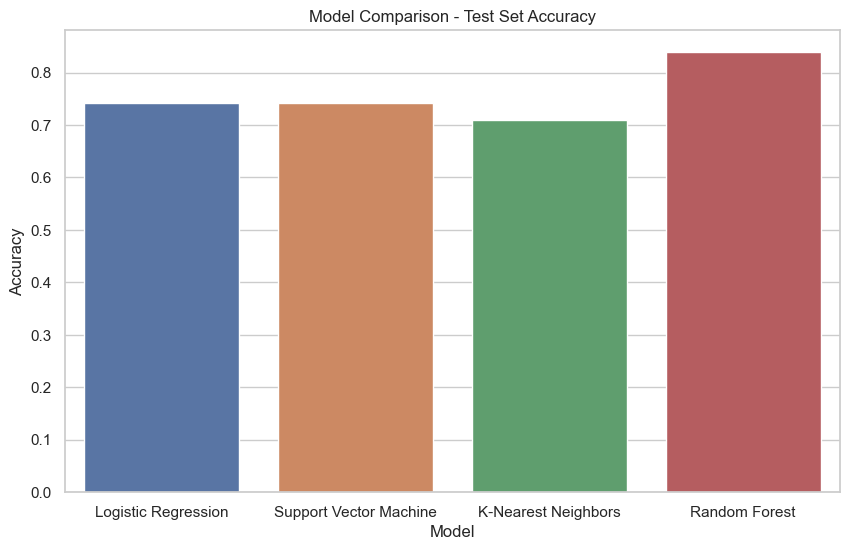

In [19]:
# Plotting Model Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.title('Model Comparison - Test Set Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


**Final Model Evaluation and Justification for Selecting Random Forest**
 - Accuracy Comparison:
Random Forest achieved the **highest accuracy (0.8387)** compared to the other models (Logistic Regression and SVM both at 0.7419, KNN at 0.7097). This suggests that Random Forest is the most effective at predicting the target variable on the test set. While the accuracy is not the only measure to consider, it gives a clear initial indication that Random Forest is the most reliable model in terms of generalization on unseen data.

- Precision, Recall, and F1-Score:
The Random Forest model displayed strong performance in both precision and recall for class 1 (presence of heart disease), with a precision of 0.80 and a recall of 0.94. This is particularly important in medical applications where identifying true positives (patients with heart disease) is critical.
For class 0 (absence of heart disease), Random Forest had a slightly lower recall (0.71), but this is common when models are more focused on minimizing false negatives (as seen in the high recall for class 1).
The F1-Score (a balance between precision and recall) for Random Forest was 0.84, which is the highest among all models, indicating a well-rounded model that performs consistently across both classes.


**Justification for Selecting Random Forest:**
- Higher Accuracy and Balanced Performance: Random Forest’s higher accuracy (0.8387) and superior F1-score (0.84) across both classes make it the best performer, providing a robust balance between precision, recall, and overall model performance.
- Feature Importance: The ability to easily interpret which features are important in making predictions makes Random Forest a valuable model, especially for understanding the underlying factors contributing to heart disease prediction.
- Versatility and Robustness: Random Forest is better equipped to handle noisy or complex data, and with the hyperparameter tuning, it performed well beyond other models like Logistic Regression, SVM, and KNN.
- Real-World Applicability: Given the importance of medical prediction tasks like this (heart disease prediction), a model that delivers both accuracy and interpretability is essential. Random Forest provides this, making it the best model for clinical or healthcare-related applications.

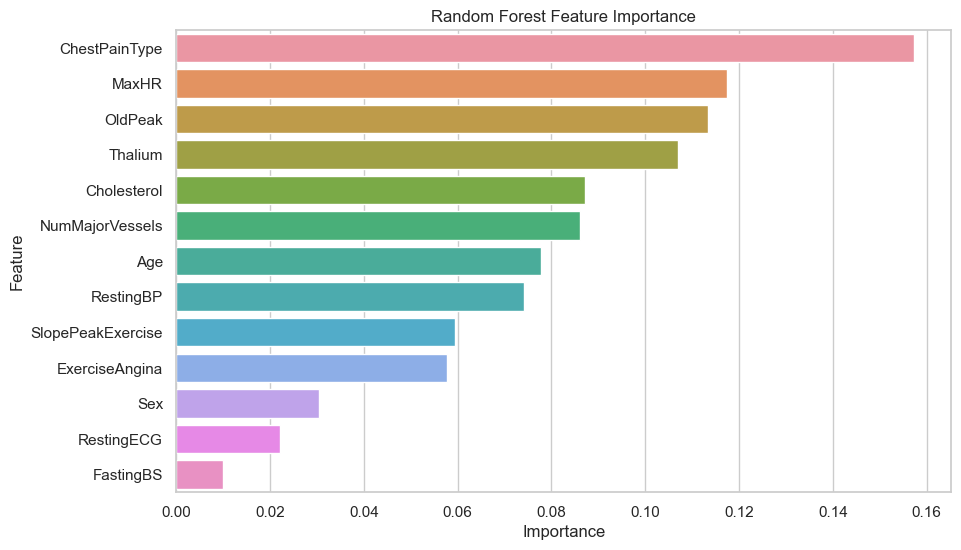

In [20]:
# Visualizing Feature Importance for Random Forest
def plot_rf_feature_importance(model, features):
    importance = model.feature_importances_
    feature_names = features.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Random Forest Feature Importance')
    plt.show()
    

# For Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
plot_rf_feature_importance(rf_model, X_train)



In [21]:
# Train the Random Forest model using the best parameters from GridSearchCV
best_rf_model = rf_grid.best_estimator_

# Train on the entire training set
best_rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_test_pred = best_rf_model.predict(X_test_scaled)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"\nFinal Selected Model: Random Forest")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Final Classification Report on Test Set:\n{test_classification_report}")



Final Selected Model: Random Forest
Test Set Accuracy: 0.8387
Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.80      0.94      0.86        17

    accuracy                           0.84        31
   macro avg       0.85      0.83      0.83        31
weighted avg       0.85      0.84      0.84        31

